In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import matplotlib.pyplot as plt
# import plotly.express as px

In [2]:
x_cos = np.linspace(0, 10, 10000)
y_cos = np.cos(x_cos)

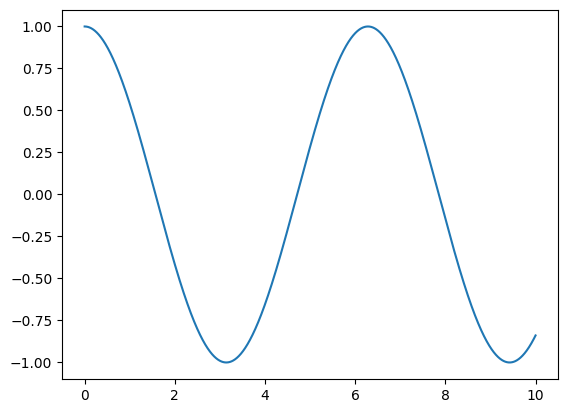

In [3]:
plt.plot(x_cos, y_cos)

Let's define the function that computes cos(x) with the power series

In [4]:
def cos_with_poly(x, order):
    somme = 0
    for i in range(order//2):
        somme = np.add(((-1)**i)*x**(2*i)/np.math.factorial(2*i), somme)
    return somme

For example with differents orders we have:

In [5]:
y_5 = cos_with_poly(x_cos, 5)
y_10 = cos_with_poly(x_cos, 10)
y_20 = cos_with_poly(x_cos, 20)
y_30 = cos_with_poly(x_cos, 30)

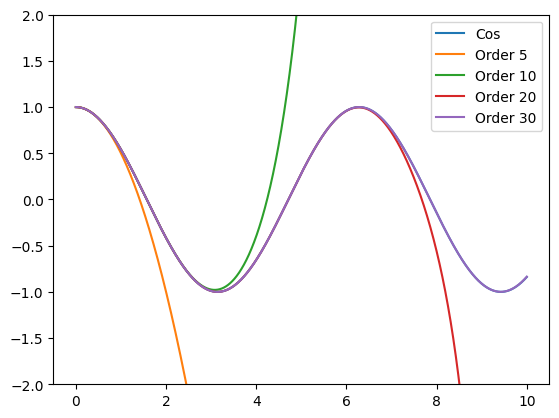

In [6]:
plt.plot(x_cos, y_cos, label='Cos')
plt.plot(x_cos, y_5, label='Order 5')
plt.plot(x_cos, y_10, label='Order 10')
plt.plot(x_cos, y_20, label='Order 20')
plt.plot(x_cos, y_30, label='Order 30')
plt.ylim(-2, 2)
plt.legend()

Let's try to do the same but with SGDRegressor

In [7]:
x_train_5 = np.c_[x_cos, x_cos**2, x_cos**3, x_cos**4, x_cos**5]
x_train_10 = np.c_[x_cos, x_cos**2, x_cos**3, x_cos**4, x_cos**5, x_cos**6, x_cos**7, x_cos**8, x_cos**9, x_cos**10]
x_train_20 = np.c_[x_cos, x_cos**2, x_cos**3, x_cos**4, x_cos**5, x_cos**6, x_cos**7, x_cos**8, x_cos**9, x_cos**10, x_cos**11, x_cos**12, x_cos**13, x_cos**14, x_cos**15, x_cos**16, x_cos**17, x_cos**18, x_cos**19, x_cos**20]
x_train_30 = np.c_[x_cos, x_cos**2, x_cos**3, x_cos**4, x_cos**5, x_cos**6, x_cos**7, x_cos**8, x_cos**9, x_cos**10, x_cos**11, x_cos**12, x_cos**13, x_cos**14, x_cos**15, x_cos**16, x_cos**17, x_cos**18, x_cos**19, x_cos**20, x_cos**21, x_cos**22, x_cos**23, x_cos**24, x_cos**25, x_cos**26, x_cos**27, x_cos**28, x_cos**29, x_cos**30]

In [8]:
scaler = StandardScaler()
X_norm_5 = scaler.fit_transform(x_train_5)
X_norm_10 = scaler.fit_transform(x_train_10)
X_norm_20 = scaler.fit_transform(x_train_20)
X_norm_30 = scaler.fit_transform(x_train_30)

In [9]:
model = linear_model.SGDRegressor(tol=1e-10, max_iter=100000)
list_x_norm = [X_norm_5, X_norm_10, X_norm_20, X_norm_30]
list_y = []
j = 0
for i in list_x_norm:
    model.fit(i, y_cos)
    list_y.append(model.predict(i))
    print(model.n_iter_)

517
413
783
1106


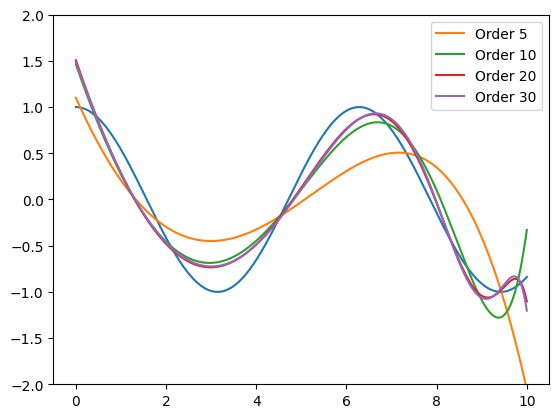

In [10]:
plt.plot(x_cos, y_cos)
plt.plot(x_cos, list_y[0], label='Order 5')
plt.plot(x_cos, list_y[1], label='Order 10')
plt.plot(x_cos, list_y[2], label='Order 20')
plt.plot(x_cos, list_y[3], label='Order 30')
plt.ylim(-2, 2)
plt.legend()

In [11]:
model = linear_model.Ridge(tol=1e-10, max_iter=100000)
list_x_norm = [X_norm_5, X_norm_10, X_norm_20, X_norm_30]
list_y = []
j = 0
for i in list_x_norm:
    model.fit(i, y_cos)
    list_y.append(model.predict(i))
    print(model.n_iter_)

None
None
None
None


In [12]:
model = linear_model.Lasso(tol=1e-10, max_iter=100000)
list_x_norm = [X_norm_5, X_norm_10, X_norm_20, X_norm_30]
list_y = []
j = 0
for i in list_x_norm:
    model.fit(i, y_cos)
    list_y.append(model.predict(i))
    print(model.n_iter_)

1
1
1
1
